In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer
from statistics import median
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns

In [2]:
train_without_nan = pd.read_csv('train.csv').dropna()
train_without_nan

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [3]:
train_without_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [5]:
#Обучаем модель с удаленными пропущенными значениями и без категориальных переменных
X, y = train_without_nan[['Age', 'SibSp', 'Parch', 'Fare']], train_without_nan['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = LogisticRegression().fit(X_train, y_train)

In [6]:
# смотрим разницу факта и прогноза для логистической регрессии
result_log = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_log.columns = ['y_test', 'y_pred']
result_log.head()

,y_test,y_pred
0,0,1
1,0,1
2,1,1
3,0,1
4,1,1


In [7]:
#На обучаемой выборке
accuracy_score(y_train, lr.predict(X_train))

0.726027397260274

In [8]:
#На тестовой выборке
accuracy_score(y_test, lr.predict(X_test))

0.6756756756756757

In [9]:
train = pd.read_csv('train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
#Поскольку у «Embarked» было только два пропущенных значения и наибольшее количество пассажиров отправлялось из Саутгемптона, вероятность посадки в Саутгемптоне выше
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace = True)

In [12]:
#В колонке «Cabin» слишком много пропущенных данных, определим их как отдельный класс
train['Cabin'] = train['Cabin'].fillna('NA')

In [13]:
#Извлекаем из строк с именем обращение (мистер, миссис и т.д), группируем по этому обращению, подставляем медианное значение
train['Temp'] = train['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())
grp = dict(train.groupby(by=['Temp'])['Age'].median())
train['Age'] = train[['Age','Temp']].apply(lambda x: grp[x[1]] if np.isnan(x[0]) == True else x[0], axis=1).astype('int')

In [14]:
#Преобразуем Age в категориальный признак
for j in train.index:
    if train['Age'][j] < 18.0:
        train.loc[j, 'Age'] = 'Молодой'
    elif train['Age'][j] >= 18.0 and train['Age'][j] <= 65.0:
        train.loc[j, 'Age'] = 'Взрослый'
    else:
        train.loc[j, 'Age'] = 'Пенсионер'

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd3f0ec760>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd3f0ecca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd3f0ec4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd3f0ed1e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd3f0ed480>],
 'means': []}

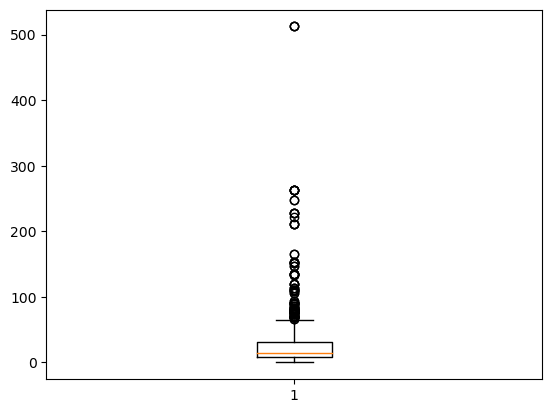

In [15]:
#Не считаем это выбросом, возможно, это был президентский люкс
plt.boxplot(train['Fare'])

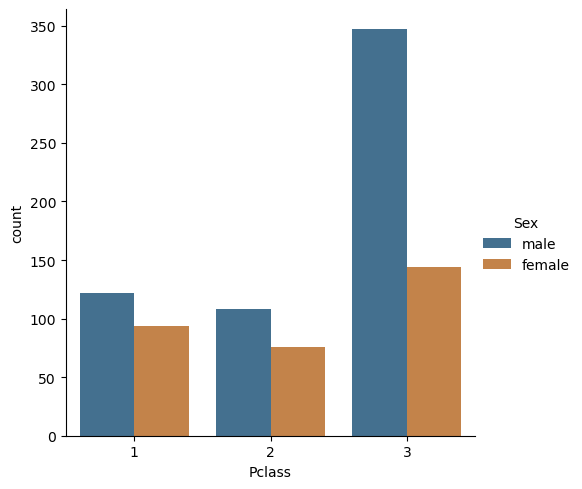

In [16]:
#В первом и втором классе мужчин и женщин примерно поровну, а в третьем классе мужчин явно больше
sns.catplot(data = train,hue = 'Sex', x = 'Pclass',
            kind='count', saturation=0.5)

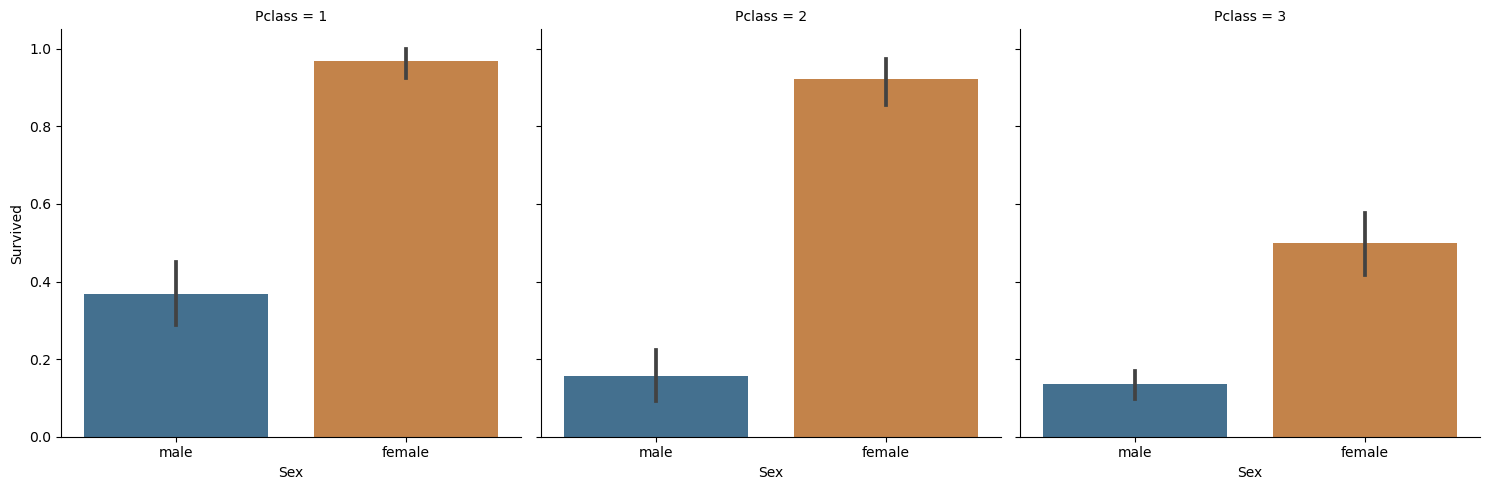

In [17]:
#Во всех классах женщины спаслись больше мужчин
sns.catplot(data = train,y='Survived',x='Sex',col='Pclass',
            kind='bar', saturation=0.5)

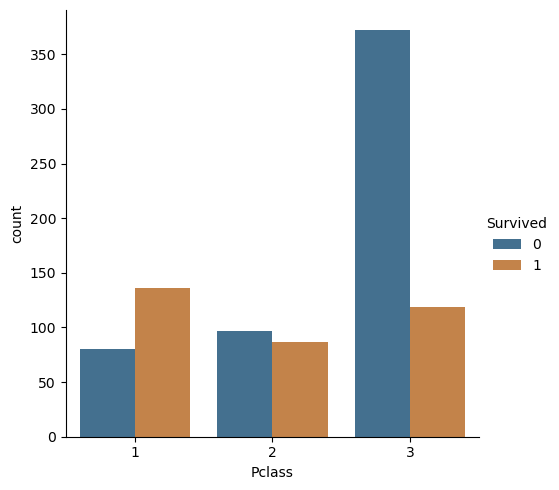

In [18]:
#Большинство погибших- это пассажиры третьего класса, а наименьшее число гиблей и наибольшее выживших мы наблюдаем в первом классе. Видим связь: вероятность погибнуть у мужчины в третьем классе больше, чем вероятность погибнуть у всех остальных пассажиров 
sns.catplot(data = train,hue = 'Survived', x = 'Pclass',
            kind='count', saturation=0.5)

In [19]:
#При удалении пустых значений потеряем около 80% данных
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    object 
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Temp         891 non-null    object 
dtypes: float64(1), int64(5), object(7)
memory usage: 90.6+ KB


In [20]:
train = train.loc[:, ~train.columns.isin(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Temp'])]
le = LabelEncoder()
transformer = make_column_transformer((OneHotEncoder(), ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked', 'Fare']), remainder='passthrough', sparse_threshold=0)
transformed = transformer.fit_transform(train)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
transformed_df

,onehotencoder__Pclass_1,onehotencoder__Pclass_2,onehotencoder__Pclass_3,onehotencoder__Sex_female,onehotencoder__Sex_male,onehotencoder__Age_Взрослый,onehotencoder__Age_Молодой,onehotencoder__Age_Пенсионер,onehotencoder__SibSp_0,onehotencoder__SibSp_1,...,onehotencoder__Fare_164.8667,onehotencoder__Fare_211.3375,onehotencoder__Fare_211.5,onehotencoder__Fare_221.7792,onehotencoder__Fare_227.525,onehotencoder__Fare_247.5208,onehotencoder__Fare_262.375,onehotencoder__Fare_263.0,onehotencoder__Fare_512.3292,remainder__Survived
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
889,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
X, y = transformed_df.loc[:, ~transformed_df.columns.isin(['remainder__Survived'])], transformed_df['remainder__Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
lr = LogisticRegression().fit(X_train, y_train)

In [22]:
# смотрим разницу факта и прогноза для логистической регрессии
result_log = pd.DataFrame([np.array(y_test), lr.predict(X_test)]).T
result_log.columns = ['y_test', 'y_pred']
result_log.head()

,y_test,y_pred
0,1.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0


In [23]:
#На обучаемой выборке
accuracy_score(y_train, lr.predict(X_train))

0.8721910112359551

In [24]:
#На тестовой выборке
accuracy_score(y_test, lr.predict(X_test))

0.8268156424581006

Видим, что при заполнении пропусков наша метрика качества выросла, и модель стала работать лучше, нежели мы удалим данные с пропусками на ~ 20%